In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"  # Only GPU 0 will be visible to JAX.
import jax

# Verify the available devices
print("Available devices:", jax.devices())

Available devices: [CudaDevice(id=0)]


In [2]:
import os
os.environ['SPS_HOME'] = '/export/home/aschaibl/fsps'

In [3]:
import logging

# Disable all logging messages
logging.disable(logging.CRITICAL)

# Load the ssp template from FSPS

In [4]:
# NBVAL_SKIP
from rubix.spectra.ssp.factory import get_ssp_template
ssp_fsps = get_ssp_template("FSPS")

In [5]:
age_values = ssp_fsps.age
print(age_values.shape)

metallicity_values = ssp_fsps.metallicity
print(metallicity_values.shape)

(107,)
(12,)


In [6]:
index = 90
metallicity_index = 3
initial_age_index = 50
learning = 0.01
tol = 1e-6

print(f"start age: {age_values[initial_age_index]}")
print(age_values[index], metallicity_values[metallicity_index])

start age: 0.03162277489900589
3.1622777 0.00044904352


# Configure pipeline

In [7]:
from rubix.core.pipeline import RubixPipeline
# Suppose you already have a user_config or path to config
#config = "../rubix/config/pipeline_config.yaml"
import os
config = {
    "pipeline":{"name": "calc_gradient"},
    
    "logger": {
        "log_level": "DEBUG",
        "log_file_path": None,
        "format": "%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    },
    "data": {
        "name": "IllustrisAPI",
        "args": {
            "api_key": os.environ.get("ILLUSTRIS_API_KEY"),
            "particle_type": ["stars"],
            "simulation": "TNG50-1",
            "snapshot": 99,
            "save_data_path": "data",
        },
        
        "load_galaxy_args": {
        "id": 14,
        "reuse": True,
        },
        
        "subset": {
            "use_subset": True,
            "subset_size": 2,
        },
    },
    "simulation": {
        "name": "IllustrisTNG",
        "args": {
            "path": "data/galaxy-id-14.hdf5",
        },
    
    },
    "output_path": "output",
    "output_modified":  False,

    "telescope":
        {"name": "TESTGRADIENT",
         "psf": {"name": "gaussian", "size": 5, "sigma": 0.6},
         "lsf": {"sigma": 0.5},
         "noise": {"signal_to_noise": 1,"noise_distribution": "normal"},
         },
    "cosmology":
        {"name": "PLANCK15"},
        
    "galaxy":
        {"dist_z": 0.1,
         "rotation": {"type": "edge-on"},
        },
        
    "ssp": {
        "template": {
            "name": "FSPS",
        },
    },        
}
pipe = RubixPipeline(config)
rubixdata = pipe.run()

/export/home/aschaibl/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /export/home/aschaibl/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
/export/home/aschaibl/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /export/home/aschaibl/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
/export/home/aschaibl/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /export/home/aschaibl/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
/export/home/aschaibl/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /export/home/aschaibl/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
/export/home/aschaibl/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /export/home/aschaibl/rubix/rubix/telescope/telescopes.yaml
  

# Set target values

In [8]:
import jax.numpy as jnp

rubixdata.stars.age = jnp.array([age_values[index], age_values[index]])
rubixdata.stars.metallicity = jnp.array([metallicity_values[metallicity_index], metallicity_values[metallicity_index]])
rubixdata.stars.mass = jnp.array([[1.0, 1.0]])
rubixdata.stars.velocity = jnp.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]])

In [9]:
from rubix.core.pipeline_gradient import RubixPipeline
# Suppose you already have a user_config or path to config
#config = "../rubix/config/pipeline_config.yaml"
import os
config = {
    "pipeline":{"name": "calc_gradient"},
    
    "logger": {
        "log_level": "DEBUG",
        "log_file_path": None,
        "format": "%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    },
     "data": {
        "args": {
            "particle_type": ["stars"],
        },
    },
    
    "output_path": "output",
    "output_modified":  False,

    "telescope":
        {"name": "TESTGRADIENT",
         "psf": {"name": "gaussian", "size": 5, "sigma": 0.6},
         "lsf": {"sigma": 0.5},
         "noise": {"signal_to_noise": 1,"noise_distribution": "normal"},
         },
    "cosmology":
        {"name": "PLANCK15"},
        
    "galaxy":
        {"dist_z": 0.1,
         "rotation": {"type": "edge-on"},
        },
        
    "ssp": {
        "template": {
            "name": "FSPS"
        },
    },        
}
pipe = RubixPipeline(config)
rubixdata = pipe.run(rubixdata)

target = rubixdata

/export/home/aschaibl/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /export/home/aschaibl/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
/export/home/aschaibl/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /export/home/aschaibl/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
/export/home/aschaibl/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /export/home/aschaibl/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
/export/home/aschaibl/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /export/home/aschaibl/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
/export/home/aschaibl/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /export/home/aschaibl/rubix/rubix/telescope/telescopes.yaml
  

# Initial datacube

In [10]:
rubixdata.stars.age = jnp.array([age_values[initial_age_index], age_values[initial_age_index]])
rubixdata.stars.metallicity = jnp.array([metallicity_values[metallicity_index], metallicity_values[metallicity_index]])
rubixdata.stars.mass = jnp.array([[1.0, 1.0]])
rubixdata.stars.velocity = jnp.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]])

In [11]:
from rubix.core.pipeline_gradient import RubixPipeline
# Suppose you already have a user_config or path to config
#config = "../rubix/config/pipeline_config.yaml"
import os
config = {
    "pipeline":{"name": "calc_gradient"},
    
    "logger": {
        "log_level": "DEBUG",
        "log_file_path": None,
        "format": "%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    },
     "data": {
        "args": {
            "particle_type": ["stars"],
        },
    },
    
    "output_path": "output",
    "output_modified":  False,

    "telescope":
        {"name": "TESTGRADIENT",
         "psf": {"name": "gaussian", "size": 5, "sigma": 0.6},
         "lsf": {"sigma": 0.5},
         "noise": {"signal_to_noise": 100,"noise_distribution": "normal"},
         },
    "cosmology":
        {"name": "PLANCK15"},
        
    "galaxy":
        {"dist_z": 0.1,
         "rotation": {"type": "edge-on"},
        },
        
    "ssp": {
        "template": {
            "name": "FSPS"
        },
    },        
}
pipe = RubixPipeline(config)
rubixdata = pipe.run(rubixdata)

initial = rubixdata

/export/home/aschaibl/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /export/home/aschaibl/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
/export/home/aschaibl/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /export/home/aschaibl/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
/export/home/aschaibl/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /export/home/aschaibl/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
/export/home/aschaibl/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /export/home/aschaibl/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
/export/home/aschaibl/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /export/home/aschaibl/rubix/rubix/telescope/telescopes.yaml
  

# Adam optimizer

In [12]:

import jax
import jax.numpy as jnp
import optax

#@jax.jit
#def compute_loss_and_grad(age, data, target):
#    return jax.value_and_grad(pipe.loss_only_wrt_age)(age, data, target)

def adam_optimization(loss_fn, age_init, data, target, learning_rate=0.1, tol=1e-3, max_iter=500):
    age = age_init  # initialize stellar age (a scalar)
    optimizer = optax.adam(learning_rate)
    optimizer_state = optimizer.init(age)
    
    age_history = []
    loss_history = []
    
    for i in range(max_iter):
        #loss, grad = compute_loss_and_grad(age, data, target)
        loss, grad = jax.value_and_grad(loss_fn)(age, data, target)
        loss_history.append(float(loss))
        age_history.append(float(age[0,0]))
        
        updates, optimizer_state = optimizer.update(grad, optimizer_state)
        age = optax.apply_updates(age, updates)
        
        # Optionally clip the age to enforce physical constraints, e.g., between 0 and 10.3
        age = jnp.clip(age, 0.0, 10.3)
        
        if jnp.linalg.norm(updates) < tol:
            print(f"Converged at iteration {i}")
            break

    return age, jnp.array(age_history), jnp.array(loss_history)

In [13]:
import jax
import jax.numpy as jnp
import optax

def step_fn(loss_fn, age, optimizer, optimizer_state, data, target):
    loss, grad = jax.value_and_grad(loss_fn)(age, data, target)
    updates, optimizer_state = optimizer.update(grad, optimizer_state)
    age = optax.apply_updates(age, updates)
    age = jnp.clip(age, 0.0, 10.3)
    return age, optimizer_state, loss

@jax.jit
def step_jit(loss_fn, age, optimizer, optimizer_state, data, target):
    return step_fn(loss_fn, age, optimizer, optimizer_state, data, target)

def adam_optimization2(loss_fn, age_init, data, target, learning_rate=0.1, tol=1e-3, max_iter=500):
    age = age_init  # initialize stellar age (a scalar) 
    optimizer = optax.adam(learning_rate)
    optimizer_state = optimizer.init(age)

    age_history = []
    loss_history = []

    for i in range(max_iter):
        age, optimizer_state, loss = step_jit(loss_fn, age, optimizer, optimizer_state, data, target)
        loss_history.append(float(loss))
        age_history.append(float(age[0,0]))

        if jnp.linalg.norm(optimizer_state[1]) < tol:
            print(f"Converged at iteration {i}")
            break

    return age, jnp.array(age_history), jnp.array(loss_history)

In [14]:
"""
def adam_scan(loss_fn, age_init, data, target, learning_rate=0.1, max_iter=500):
    optimizer = optax.adam(learning_rate)
    
    def step_fn(carry, _):
        age, optimizer_state = carry
        loss, grad = jax.value_and_grad(loss_fn)(age, data, target)
        updates, optimizer_state = optimizer.update(grad, optimizer_state)
        age = optax.apply_updates(age, updates)
        age = jnp.clip(age, 0.0, 10.3)
        return (age, optimizer_state), (age, loss)
    
    init_carry = (age_init, optimizer.init(age_init))
    (final_carry, history) = jax.lax.scan(step_fn, init_carry, None, length=max_iter)
    final_age, _ = final_carry
    age_history, loss_history = history
    return final_age, age_history, loss_history
    """

'\ndef adam_scan(loss_fn, age_init, data, target, learning_rate=0.1, max_iter=500):\n    optimizer = optax.adam(learning_rate)\n    \n    def step_fn(carry, _):\n        age, optimizer_state = carry\n        loss, grad = jax.value_and_grad(loss_fn)(age, data, target)\n        updates, optimizer_state = optimizer.update(grad, optimizer_state)\n        age = optax.apply_updates(age, updates)\n        age = jnp.clip(age, 0.0, 10.3)\n        return (age, optimizer_state), (age, loss)\n    \n    init_carry = (age_init, optimizer.init(age_init))\n    (final_carry, history) = jax.lax.scan(step_fn, init_carry, None, length=max_iter)\n    final_age, _ = final_carry\n    age_history, loss_history = history\n    return final_age, age_history, loss_history\n    '

In [15]:

"""
import functools
import jax
import jax.numpy as jnp
import optax

# Wrap your loss function so that "pipe" is a static argument.
def loss_with_pipe(age, data, target, pipe):
    return pipe.loss_only_wrt_age(age, data, target)

# Create a version of the loss that treats the last argument as static.
loss_fn_static = functools.partial(loss_with_pipe, pipe=pipe)

def adam_optimization(loss_fn, age_init, data, target, learning_rate=0.1, tol=1e-3, max_iter=500):
    age = age_init  # initial guess
    optimizer = optax.adam(learning_rate)
    optimizer_state = optimizer.init(age)
    
    age_history = []
    loss_history = []
    
    for i in range(max_iter):
        # Here, "loss_fn" does not depend on any non‑hashable objects
        loss, grad = jax.value_and_grad(loss_fn)(age, data, target)
        loss_history.append(loss)
        age_history.append(age)
        
        updates, optimizer_state = optimizer.update(grad, optimizer_state)
        age = optax.apply_updates(age, updates)
        
        # Optionally enforce physical constraints
        age = jnp.clip(age, 0.0, 10.3)
        if jnp.linalg.norm(updates) < tol:
            print(f"Converged at iteration {i}")
            break

    return age, jnp.array(age_history), jnp.array(loss_history)

# Then call your optimization function, using the wrapped loss:
optimized_age, age_history, loss_history = adam_optimization(
    loss_fn_static, 
    age_init=jnp.array([[age_values[initial_age_index], age_values[initial_age_index]]]),
    data=initial,
    target=target,
    learning_rate=learning,
    tol=tol,
    max_iter=500
)

print(f"Optimized Age: {optimized_age}")
"""

'\nimport functools\nimport jax\nimport jax.numpy as jnp\nimport optax\n\n# Wrap your loss function so that "pipe" is a static argument.\ndef loss_with_pipe(age, data, target, pipe):\n    return pipe.loss_only_wrt_age(age, data, target)\n\n# Create a version of the loss that treats the last argument as static.\nloss_fn_static = functools.partial(loss_with_pipe, pipe=pipe)\n\ndef adam_optimization(loss_fn, age_init, data, target, learning_rate=0.1, tol=1e-3, max_iter=500):\n    age = age_init  # initial guess\n    optimizer = optax.adam(learning_rate)\n    optimizer_state = optimizer.init(age)\n    \n    age_history = []\n    loss_history = []\n    \n    for i in range(max_iter):\n        # Here, "loss_fn" does not depend on any non‑hashable objects\n        loss, grad = jax.value_and_grad(loss_fn)(age, data, target)\n        loss_history.append(loss)\n        age_history.append(age)\n        \n        updates, optimizer_state = optimizer.update(grad, optimizer_state)\n        age = opt

In [16]:

data = initial  # Replace with your actual data if needed
target_value = target  # Replace with your actual target
age_init = jnp.array([[age_values[initial_age_index], age_values[initial_age_index]]])  # Initial guess for the stellar age

optimized_age, age_history, loss_history = adam_optimization(pipe.loss_only_wrt_age, age_init, data, target_value,
                                                               learning_rate=learning, tol=tol, max_iter=500)

#optimized_age, age_history, loss_history = adam_scan(pipe.loss_only_wrt_age, age_init, data, target_value,
#                                                               learning_rate=learning, max_iter=500)

print(f"Optimized Age: {optimized_age}")


/export/home/aschaibl/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /export/home/aschaibl/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
/export/home/aschaibl/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /export/home/aschaibl/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
/export/home/aschaibl/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /export/home/aschaibl/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
/export/home/aschaibl/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /export/home/aschaibl/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
/export/home/aschaibl/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /export/home/aschaibl/rubix/rubix/telescope/telescopes.yaml
  

Optimized Age: [[0.4163964 0.4163964]]


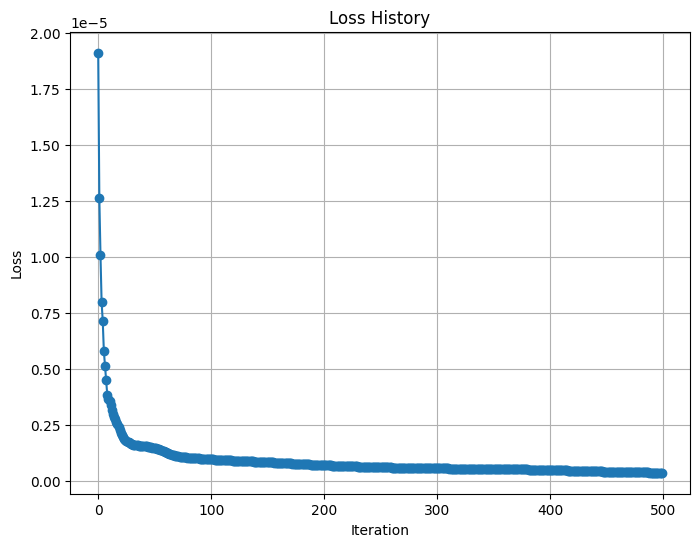

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# If loss_history is a JAX array, convert it to a NumPy array:
loss_history_np = np.array(loss_history)

# Create an array for the x-axis indices
indices = np.arange(len(loss_history_np))

plt.figure(figsize=(8, 6))
plt.plot(indices, loss_history_np, marker='o', linestyle='-')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss History")
plt.grid(True)
#plt.ylim(-1e-8, 2e-7)
#plt.savefig(f"./output/optimizer/optimization_progress_loss_metals{metallicity_index}_agestart{initial_age_index}_to{index}_learning{learning}_tol{tol}.png")
plt.show()

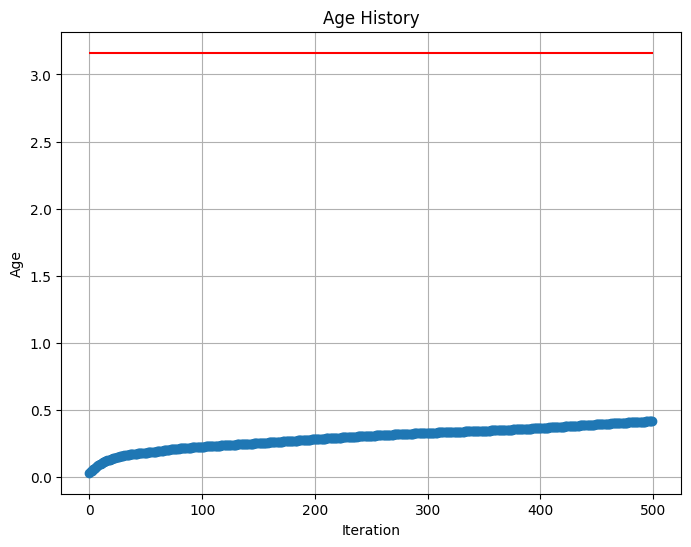

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# If age_history is a JAX array, convert it to a NumPy array:
age_history_np = np.array(age_history)

# Create an array for the x-axis indices
indices = np.arange(len(age_history_np))

plt.figure(figsize=(8, 6))
plt.plot(indices, age_history_np, marker='o', linestyle='-')
plt.hlines(y=age_values[index], xmin=0, xmax=len(age_history_np), color='r', linestyle='-')
plt.xlabel("Iteration")
plt.ylabel("Age")
plt.title("Age History")
plt.grid(True)
#plt.savefig(f"./output/optimizer/optimization_progress_age_metals{metallicity_index}_agestart{initial_age_index}_to{index}_learning{learning}_tol{tol}.png")
plt.show()

In [ ]:
#run the pipeline with the optimized age
#rubixdata.stars.age = optimized_age
i = 1
rubixdata.stars.age = jnp.array([age_history[i, 0, 0], age_history[i, 0, 0]])
rubixdata.stars.metallicity = jnp.array([metallicity_values[metallicity_index], metallicity_values[metallicity_index]])
rubixdata.stars.mass = jnp.array([[1.0, 1.0]])
rubixdata.stars.velocity = jnp.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]])

pipe = RubixPipeline(config)
rubixdata = pipe.run(rubixdata)

#plot the target and the optimized spectra
import matplotlib.pyplot as plt
wave = pipe.telescope.wave_seq

spectra_target = target.stars.datacube
spectra_optimitzed = rubixdata.stars.datacube

plt.plot(wave, spectra_target[0,0,:], label=f"Target age = {age_values[index]:.2f}")
plt.plot(wave, spectra_optimitzed[0,0,:], label=f"Optimized age = {age_history[i, 0, 0]:.2f}")
plt.xlabel("Wavelength [Å]")
plt.ylabel("Luminosity [L/Å]")
plt.title(f"Loss {loss_history[i]:.2e}")
plt.legend()
plt.ylim(0, 0.0003)
plt.grid(True)
plt.show()

# Create gif

In [ ]:
import matplotlib.pyplot as plt
import imageio
import jax.numpy as jnp
# Create a temporary directory to save frame images
frames_folder = 'frames'
os.makedirs(frames_folder, exist_ok=True)

frame_files = []

# Loop over the indices in age_history to generate frames.
for i in range(len(age_history)):
    # Update the Rubix data object with current parameters.
    # (Adjust indexing as needed; here age_history[i,0,0] is used.)
    rubixdata.stars.age = jnp.array([age_history[i, 0, 0], age_history[i, 0, 0]])
    rubixdata.stars.metallicity = jnp.array([metallicity_values[metallicity_index], metallicity_values[metallicity_index]])
    rubixdata.stars.mass = jnp.array([[1.0, 1.0]])
    rubixdata.stars.velocity = jnp.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]])
    
    # Run the pipeline to update the spectra
    pipe = RubixPipeline(config)
    rubixdata = pipe.run(rubixdata)
    
    # Retrieve wavelength sequence and spectra from the pipeline
    wave = pipe.telescope.wave_seq
    spectra_target = target.stars.datacube
    spectra_optimized = rubixdata.stars.datacube

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.plot(wave, spectra_target[0, 0, :], label=f"Target age = {age_values[index]:.2f}")
    plt.plot(wave, spectra_optimized[0, 0, :], label=f"Optimized age = {age_history[i, 0, 0]:.2f}")
    plt.xlabel("Wavelength [Å]")
    plt.ylabel("Luminosity [L/Å]")
    plt.title(f"Loss {loss_history[i]:.2e}")
    plt.legend()
    plt.ylim(0, 0.003)
    plt.grid(True)
    
    # Save the frame as an image file
    frame_filename = os.path.join(frames_folder, f"frame_{i:03d}.png")
    plt.savefig(frame_filename)
    plt.close()
    frame_files.append(frame_filename)

# Create the GIF from the saved frames
gif_filename = f"./output/optimizer/gifs/optimization_progress_metals{metallicity_index}_agestart{initial_age_index}_to{index}_learning{learning}_tol{tol}.gif"
with imageio.get_writer(gif_filename, mode='I', duration=0.2) as writer:
    for frame_file in frame_files:
        image = imageio.imread(frame_file)
        writer.append_data(image)

print(f"GIF created: {gif_filename}")

# Optionally, clean up the temporary frames folder
#shutil.rmtree(frames_folder)